Task2: Titanic Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.sample(frac=0.1,random_state=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean().round())
df.drop(columns=["Cabin","Name","PassengerId","Ticket"],inplace=True)

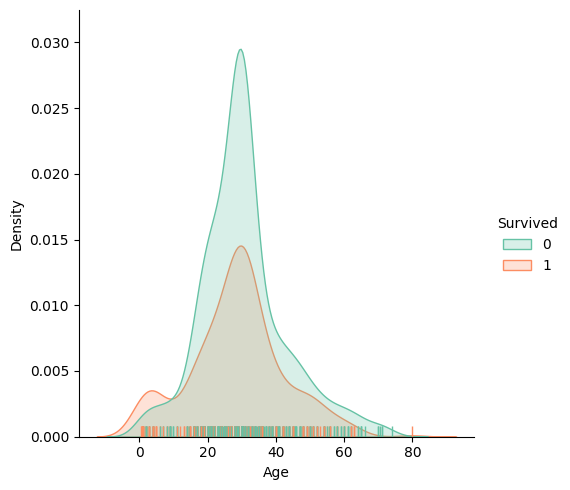

In [5]:
sns.displot(x='Age', hue='Survived', palette='Set2', data=df, fill=True,rug=True,kind='kde');

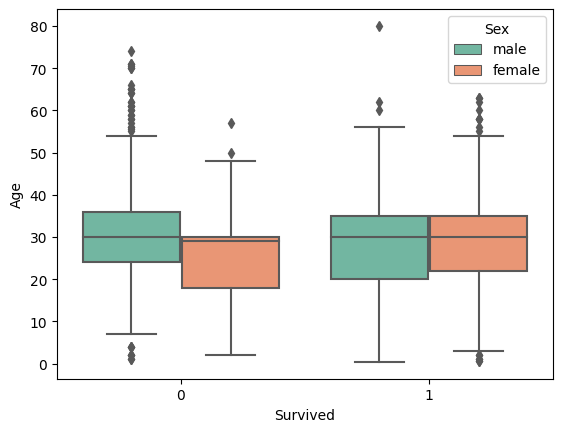

In [6]:
sns.boxplot(x='Survived', y='Age', hue='Sex', palette='Set2', data=df);

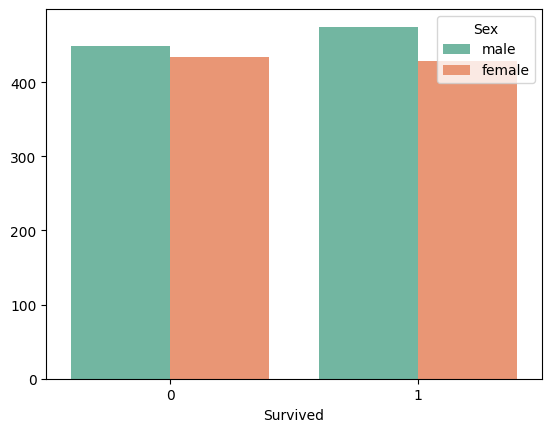

In [7]:
sns.barplot(x='Survived', y=np.arange(0,len(df)),ci=None,hue='Sex',palette='Set2',data=df);

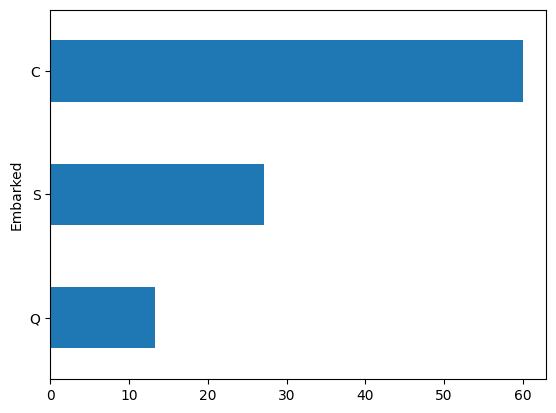

In [8]:
df.groupby("Embarked")["Fare"].mean().sort_values().plot(kind="barh");

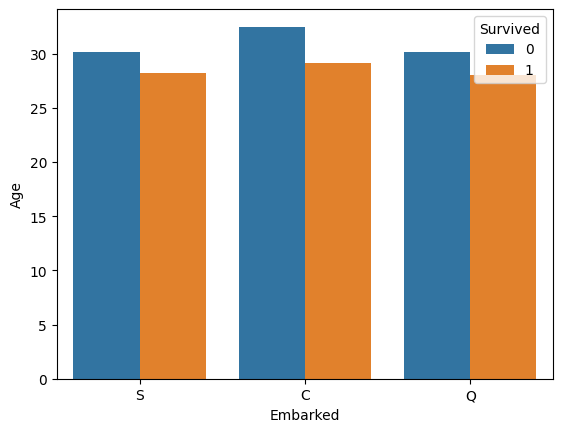

In [9]:
sns.barplot(x='Embarked',ci=None,y="Age",hue='Survived',data=df);

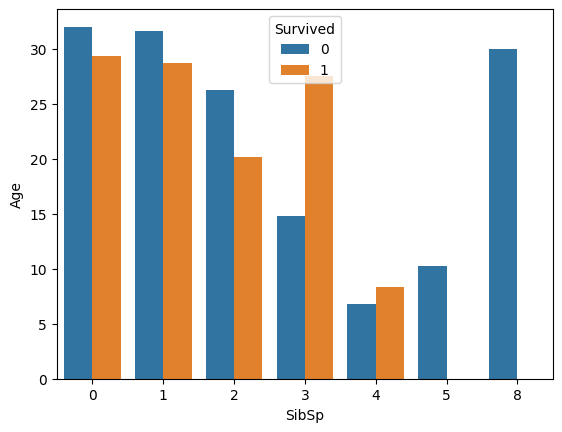

In [10]:
sns.barplot(x='SibSp',y='Age',ci=None,hue='Survived',data=df);

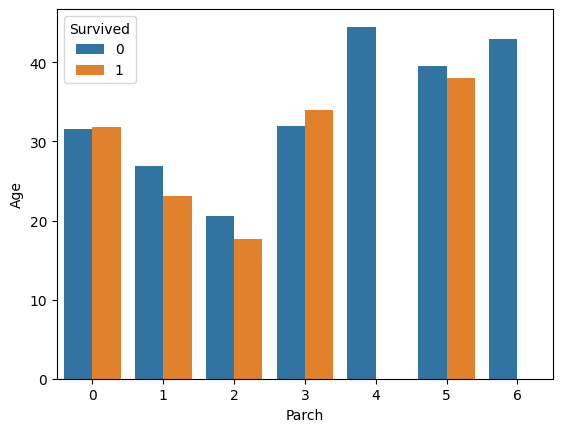

In [11]:
sns.barplot(x='Parch',y='Age',ci=None,hue='Survived',data=df);

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [14]:
le = LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [15]:
print(f"embarked {df.Embarked.unique()}\t||\tsex{df.Sex.unique()}")

embarked [2 0 1 3]	||	sex[ True False]


In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex            bool
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [17]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [18]:
df.sample(frac=0.2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
571,1,1,False,53.0,2,0,51.4792,2
102,0,1,True,21.0,0,1,77.2875,2
307,1,1,False,17.0,1,0,108.9000,0
643,1,3,True,30.0,0,0,56.4958,2
594,0,2,True,37.0,1,0,26.0000,2
...,...,...,...,...,...,...,...,...
753,0,3,True,23.0,0,0,7.8958,2
645,1,1,True,48.0,1,0,76.7292,0
779,1,1,False,43.0,0,1,211.3375,2
664,1,3,True,20.0,1,0,7.9250,2


In [19]:
X=df[[col for col in df.columns if col !="Survived"]]
Y=df['Survived']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

LogisticRegression()

In [22]:
logReg.score(X_test,Y_test)

0.8100558659217877

In [23]:
logReg_Score = logReg.score(X_test,Y_test)

In [24]:
accuracy_score(Y_test,logReg.predict(X_test))

0.8100558659217877

In [25]:
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [26]:
pred=svc.predict(X_test)

In [27]:
svc.score(X_test,Y_test)

0.659217877094972

In [28]:
cs = np.arange(0.1,10,0.1)
c_accuracies = []
for c in cs:
    model = SVC(C=c)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    c_accuracies.append(accuracy_score(Y_test,Y_pred))

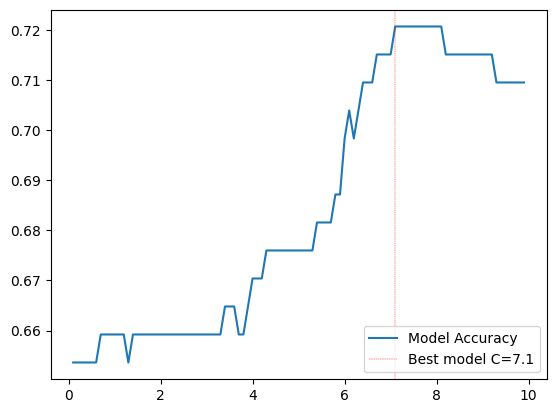

In [29]:
plt.plot(cs,c_accuracies,label="Model Accuracy")
plt.axvline(7.1,linewidth=0.3,linestyle='--',color='r',label='Best model C=7.1')
plt.legend(loc='lower right');

In [30]:
svc_model=SVC(C=7.1)
svc_model.fit(X_train,Y_train)

SVC(C=7.1)

In [31]:
svc_model.score(X_test,Y_test)

0.7206703910614525

In [32]:
svc_model_score=svc_model.score(X_test,Y_test)

In [33]:
ks=np.arange(2,20)
ks_scores = []
for k in ks:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    ks_scores.append(knn.score(X_test,Y_test))

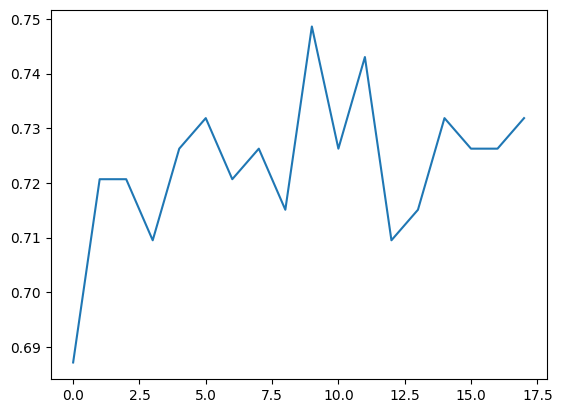

In [34]:
plt.plot(ks_scores);

In [35]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,Y_train)
knn_score= knn.score(X_test,Y_test)

In [36]:
dt=DecisionTreeClassifier()

In [37]:
depths=np.arange(2,13)
dt_scores =[]
for depth in depths:
    dt=DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,Y_train)
    dt_scores.append(dt.score(X_test,Y_test))

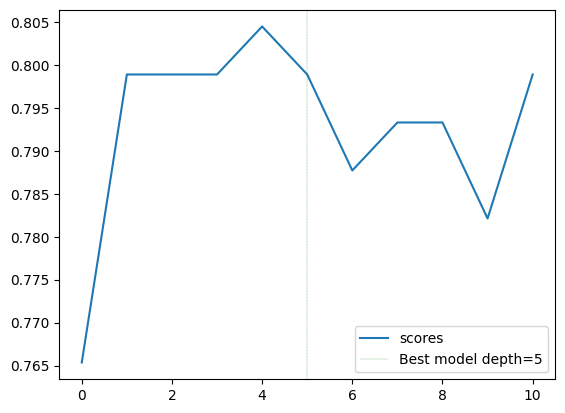

In [38]:
plt.plot(dt_scores,label='scores')
plt.axvline(5,linewidth=0.2,linestyle='--',color='green',label='Best model depth=5')
plt.legend(loc='lower right');

In [39]:
dt_model=DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train,Y_train)
Y_pred_dt= dt_model.predict(X_test)

In [40]:
dt_model_score=dt_model.score(X_test,Y_test)

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
Y_pred=rf.predict(X_test)

In [43]:
rf.score(X_test,Y_test)

0.8100558659217877

In [44]:
rf_score=rf.score(X_test,Y_test)

In [45]:
bag=BaggingClassifier(base_estimator=dt,n_estimators=200,n_jobs=-1,oob_score=True)

In [46]:
bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                  n_estimators=200, n_jobs=-1, oob_score=True)

In [47]:
bag.score(X_test,Y_test)

0.8212290502793296

In [48]:
bag_score = bag.score(X_test,Y_test)

In [49]:
bag_pred=bag.predict(X_test)
bag_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [50]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [51]:
gbc_pred=gbc.predict(X_test)
gbc_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [52]:
gbc.score(X_test,Y_test)

0.8100558659217877

In [53]:
gbc_score=gbc.score(X_test,Y_test)

In [54]:
output = pd.DataFrame({"Models":["LogisticRegressionClassifier", "Support Vector Machine(SVM)", 
"K-nearest neighbor Classifier","DecisionTreeClassifier","RandomForestClassifier","BaggingClassifier","XGBClassifier"],
"Scores":[logReg_Score,svc_model_score,knn_score,dt_model_score,rf_score,bag_score,gbc_score]}).sort_values(ascending=False,
by="Scores").reset_index(drop=True)

In [55]:
output

,Models,Scores
0,BaggingClassifier,0.821229
1,LogisticRegressionClassifier,0.810056
2,RandomForestClassifier,0.810056
3,XGBClassifier,0.810056
4,DecisionTreeClassifier,0.798883
5,K-nearest neighbor Classifier,0.731844
6,Support Vector Machine(SVM),0.720670
